In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!unzip /content/drive/MyDrive/movie_genre.zip

Streaming output truncated to the last 5000 lines.
  inflating: Multi_Label_dataset/Images/tt0126886.jpg  
  inflating: Multi_Label_dataset/Images/tt0126916.jpg  
  inflating: Multi_Label_dataset/Images/tt0127247.jpg  
  inflating: Multi_Label_dataset/Images/tt0127349.jpg  
  inflating: Multi_Label_dataset/Images/tt0127536.jpg  
  inflating: Multi_Label_dataset/Images/tt0127722.jpg  
  inflating: Multi_Label_dataset/Images/tt0127723.jpg  
  inflating: Multi_Label_dataset/Images/tt0128239.jpg  
  inflating: Multi_Label_dataset/Images/tt0128278.jpg  
  inflating: Multi_Label_dataset/Images/tt0128442.jpg  
  inflating: Multi_Label_dataset/Images/tt0128445.jpg  
  inflating: Multi_Label_dataset/Images/tt0128853.jpg  
  inflating: Multi_Label_dataset/Images/tt0129167.jpg  
  inflating: Multi_Label_dataset/Images/tt0129280.jpg  
  inflating: Multi_Label_dataset/Images/tt0129290.jpg  
  inflating: Multi_Label_dataset/Images/tt0129332.jpg  
  inflating: Multi_Label_dataset/Images/tt0129387.jpg

In [13]:
import tensorflow as tf
from keras import Sequential
from keras.layers import Conv2D,MaxPool2D,Dense,Flatten,BatchNormalization,Dropout
from keras.optimizers import Adam
from keras.preprocessing import image

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tqdm import tqdm

In [5]:
df = pd.read_csv('/content/Multi_Label_dataset/train.csv')

In [6]:
df = df.head(1000)
df.head()

,Id,Genre,Action,Adventure,Animation,Biography,Comedy,Crime,Documentary,Drama,...,N/A,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Thriller,War,Western
0,tt0086425,"['Comedy', 'Drama']",0,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,tt0085549,"['Drama', 'Romance', 'Music']",0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0
2,tt0086465,['Comedy'],0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,tt0086567,"['Sci-Fi', 'Thriller']",0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,1,0,0
4,tt0086034,"['Action', 'Adventure', 'Thriller']",1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [7]:
df.columns

Index(['Id', 'Genre', 'Action', 'Adventure', 'Animation', 'Biography',
       'Comedy', 'Crime', 'Documentary', 'Drama', 'Family', 'Fantasy',
       'History', 'Horror', 'Music', 'Musical', 'Mystery', 'N/A', 'News',
       'Reality-TV', 'Romance', 'Sci-Fi', 'Short', 'Sport', 'Thriller', 'War',
       'Western'],
      dtype='object')

In [8]:
width = 350
height = 350
X = []
for i in tqdm(range(df.shape[0])):
  path = '/content/Multi_Label_dataset/Images/'+df['Id'][i]+'.jpg'
  img = image.load_img(path,target_size=(width,height,3))
  img = image.img_to_array(img)
  img = img/255.0
  X.append(img)

X = np.array(X)

100%|██████████| 1000/1000 [00:04<00:00, 201.77it/s]


In [9]:
X.shape

(1000, 350, 350, 3)

In [10]:
y = df.drop(['Id','Genre'],axis=1)
y = y.to_numpy()
y.shape

(1000, 25)

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

In [14]:
model = Sequential()
model.add(Conv2D(16,kernel_size=(3,3),activation='relu',input_shape=X_train[0].shape))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))

model.add(Conv2D(32,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.3))


model.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool2D(2,2))
model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(25,activation='sigmoid'))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 348, 348, 16)      448       
                                                                 
 batch_normalization (Batch  (None, 348, 348, 16)      64        
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 174, 174, 16)      0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 174, 174, 16)      0         
                                                                 
 conv2d_1 (Conv2D)           (None, 172, 172, 32)      4640      
                                                                 
 batch_normalization_1 (Bat  (None, 172, 172, 32)      1

In [16]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [17]:
num_epochs = 3
history = model.fit(X_train,y_train,epochs=num_epochs, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/3
25/25 [==============================] - 171s 7s/step - loss: 0.8664 - accuracy: 0.0725 - val_loss: 0.6941 - val_accuracy: 0.0500
Epoch 2/3
25/25 [==============================] - 171s 7s/step - loss: 0.7494 - accuracy: 0.1150 - val_loss: 1.2005 - val_accuracy: 0.0000e+00
Epoch 3/3
25/25 [==============================] - 168s 7s/step - loss: 0.6843 - accuracy: 0.1250 - val_loss: 1.5398 - val_accuracy: 0.0000e+00


In [18]:
model.save('cnn_keras.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
def plotLearningCurve(history,epochs):
  epochRange = range(1,epochs+1)
  plt.plot(epochRange,history.history['accuracy'])
  plt.plot(epochRange,history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

  plt.plot(epochRange,history.history['loss'])
  plt.plot(epochRange,history.history['val_loss'])
  plt.title('Model Loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(['Train','Validation'],loc='best')
  plt.show()

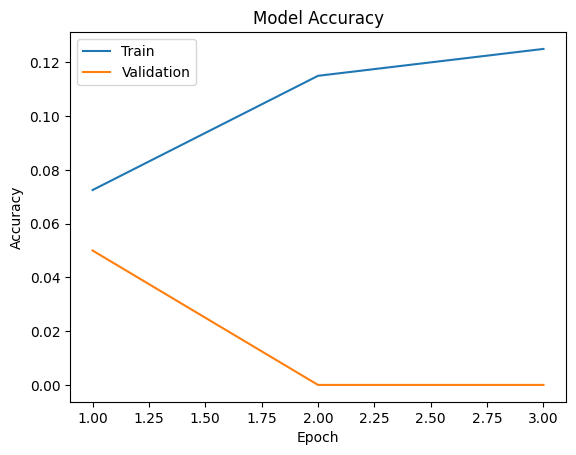

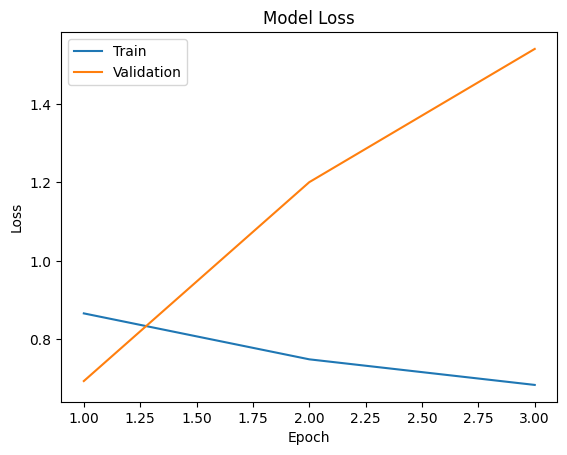

In [20]:
plotLearningCurve(history,num_epochs)

1/1 [==============================] - 1s 661ms/step
Romance
Adventure
Drama


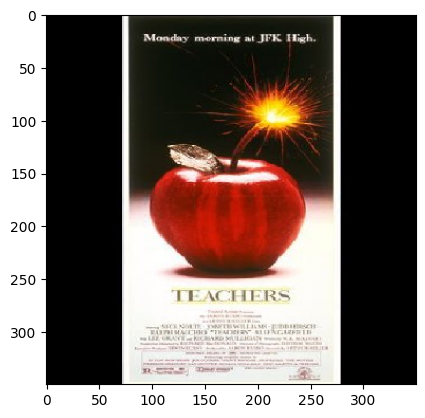

In [21]:
img = image.load_img('/content/Multi_Label_dataset/Images/tt0088242.jpg',target_size=(width,height,3))
plt.imshow(img)

img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)

classes = df.columns[2:]
y_pred = model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

Resnet Model

In [23]:
from keras.applications import ResNet50
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

# Load pre-trained ResNet50 model
resnet = ResNet50(weights='imagenet', include_top=False, input_shape=(350, 350, 3))

# Freeze pre-trained layers
for layer in resnet.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(resnet.output)
x = Dense(128, activation='relu')(x)
output = Dense(25, activation='sigmoid')(x)

# Create model
resnet_model = Model(inputs=resnet.input, outputs=output)

# Compile model
resnet_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])


In [24]:
num_epochs = 3
resnet_history = resnet_model.fit(X_train,y_train,epochs=num_epochs, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/3
25/25 [==============================] - 541s 22s/step - loss: 4.7265 - accuracy: 0.1950 - val_loss: 2.2724 - val_accuracy: 0.0400
Epoch 2/3
25/25 [==============================] - 537s 22s/step - loss: 1.3488 - accuracy: 0.2300 - val_loss: 0.8344 - val_accuracy: 0.1900
Epoch 3/3
25/25 [==============================] - 580s 23s/step - loss: 0.5088 - accuracy: 0.2825 - val_loss: 0.4762 - val_accuracy: 0.1400


In [25]:
resnet_model.save('resnet_keras.h5')

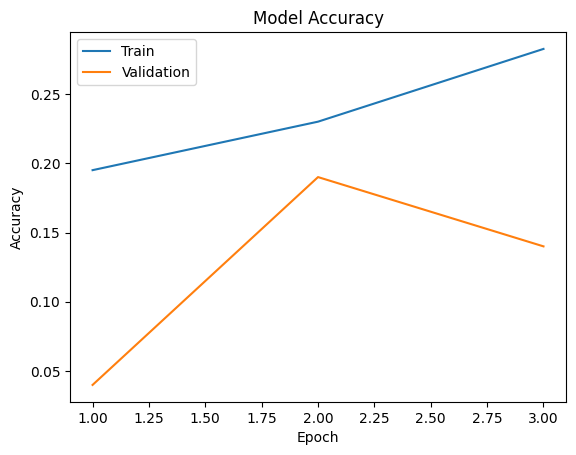

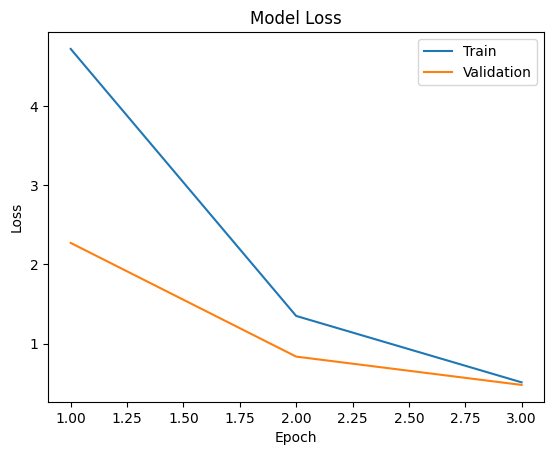

In [26]:
plotLearningCurve(resnet_history,num_epochs)

1/1 [==============================] - 2s 2s/step
Comedy
Drama
Thriller


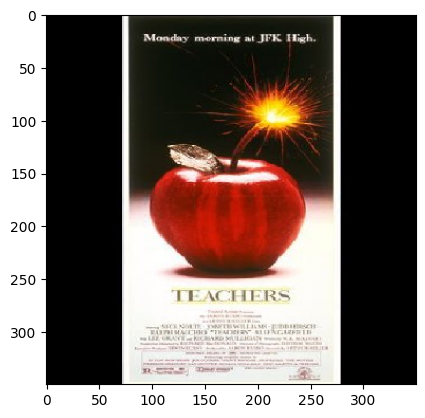

In [27]:
img = image.load_img('/content/Multi_Label_dataset/Images/tt0088242.jpg',target_size=(width,height,3))
plt.imshow(img)

img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)

classes = df.columns[2:]
y_pred = resnet_model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

VGG16

In [28]:
from keras.applications import VGG16
from keras.layers import Input, Flatten, Dense
from keras.models import Model
from keras.optimizers import Adam

# Load pre-trained VGG16 model
vgg16 = VGG16(weights='imagenet', include_top=False, input_shape=(350, 350, 3))

# Freeze pre-trained layers
for layer in vgg16.layers:
    layer.trainable = False

# Add custom classification head
x = Flatten()(vgg16.output)
x = Dense(128, activation='relu')(x)
output = Dense(25, activation='sigmoid')(x)

# Create model
vgg16_model = Model(inputs=vgg16.input, outputs=output)

# Compile model
vgg16_model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

58889256/58889256 [==============================] - 0s 0us/step


In [29]:
num_epochs = 3
vgg16_history = vgg16_model.fit(X_train,y_train,epochs=num_epochs, batch_size=32, validation_data=(X_test,y_test))

Epoch 1/3
25/25 [==============================] - 1479s 59s/step - loss: 0.5453 - accuracy: 0.2425 - val_loss: 0.3235 - val_accuracy: 0.3200
Epoch 2/3
25/25 [==============================] - 1498s 60s/step - loss: 0.1597 - accuracy: 0.5163 - val_loss: 0.2688 - val_accuracy: 0.2900
Epoch 3/3
25/25 [==============================] - 1447s 58s/step - loss: 0.0835 - accuracy: 0.5763 - val_loss: 0.2722 - val_accuracy: 0.2800


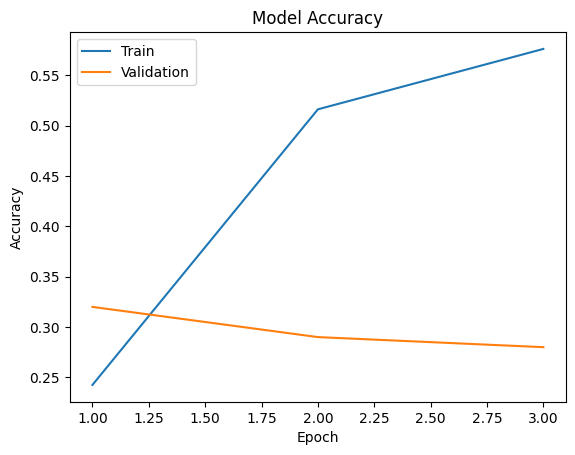

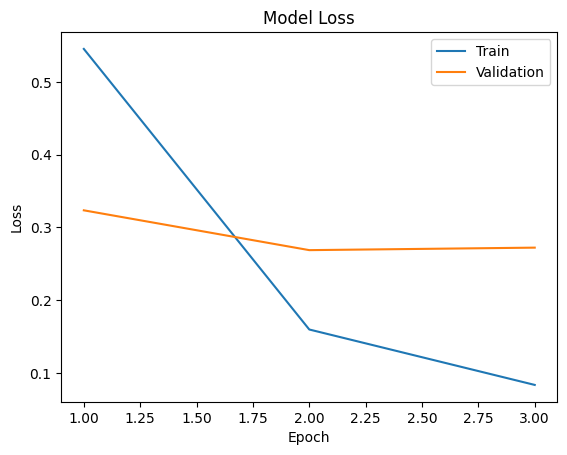

In [30]:
plotLearningCurve(vgg16_history,num_epochs)

1/1 [==============================] - 1s 1s/step
Comedy
Drama
Family


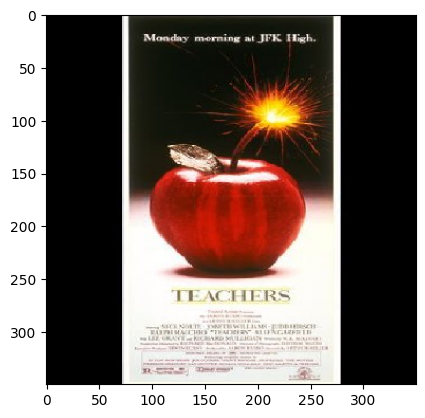

In [31]:
img = image.load_img('/content/Multi_Label_dataset/Images/tt0088242.jpg',target_size=(width,height,3))
plt.imshow(img)

img = image.img_to_array(img)
img = img/255.0
img = img.reshape(1,width,height,3)

classes = df.columns[2:]
y_pred = vgg16_model.predict(img)
top3=np.argsort(y_pred[0])[:-4:-1]

for i in range(3):
  print(classes[top3[i]])

In [32]:
vgg16_model.save('vgg16_keras.h5')

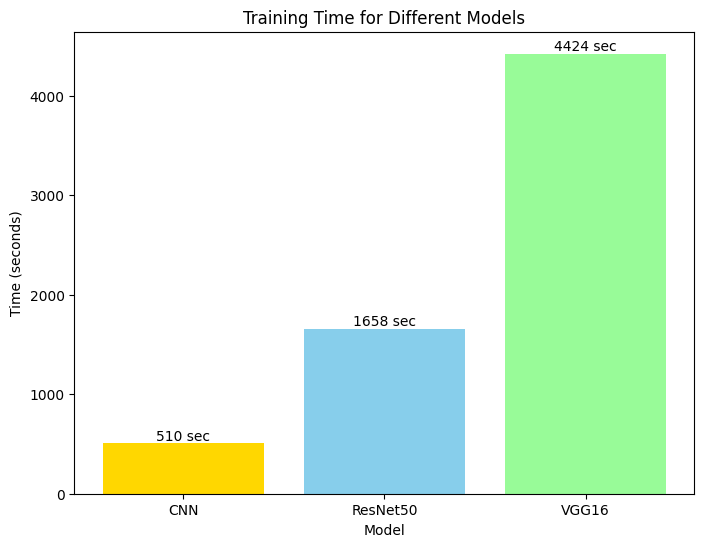

In [34]:
model_times = {'CNN': 510,
               'ResNet50': 1658,
               'VGG16': 4424}

colors = ['#FFD700', '#87CEEB', '#98FB98']

# Create bar chart
plt.figure(figsize=(8, 6))
bars = plt.bar(model_times.keys(), model_times.values(), color=colors)

# Add time on top of each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height} sec', ha='center', va='bottom')

# Add labels and title
plt.xlabel('Model')
plt.ylabel('Time (seconds)')
plt.title('Training Time for Different Models')

# Show plot
plt.show()

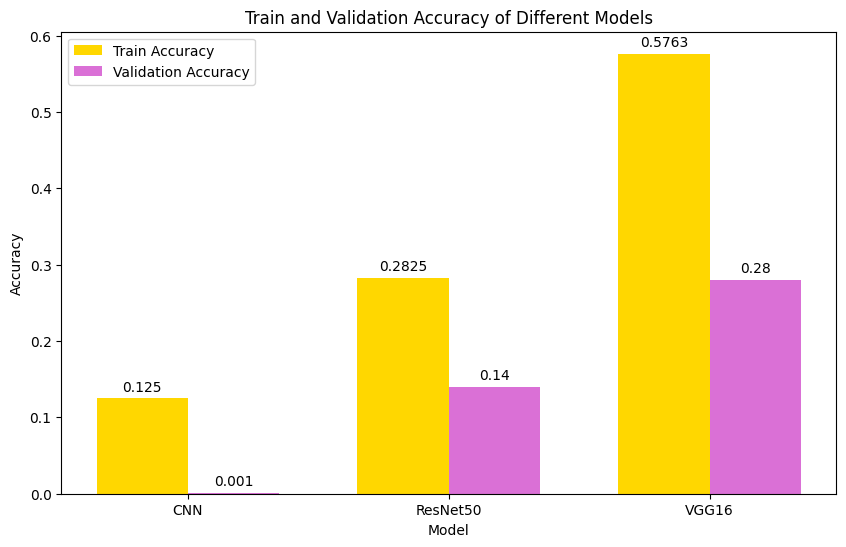

In [39]:
train_acc = {'CNN': 0.1250,
             'ResNet50': 0.2825,
             'VGG16': 0.5763}
val_acc = {'CNN': 0.001,
           'ResNet50': 0.14,
           'VGG16': 0.28}

models = train_acc.keys()

train_color = 'gold'  # Sky Blue
val_color = 'orchid'  # Pale Green

# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Bar width
bar_width = 0.35
index = np.arange(len(models))

# Train accuracy bars
train_bars = ax.bar(index, train_acc.values(), bar_width, label='Train Accuracy', color=train_color)

# Validation accuracy bars
val_bars = ax.bar(index + bar_width, val_acc.values(), bar_width, label='Validation Accuracy', color=val_color)

# Add labels and title
ax.set_xlabel('Model')
ax.set_ylabel('Accuracy')
ax.set_title('Train and Validation Accuracy of Different Models')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(models)
ax.legend()

# Display values on top of bars
def autolabel(bars):
    for bar in bars:
        height = bar.get_height()
        ax.annotate('{}'.format(height),
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(train_bars)
autolabel(val_bars)

plt.show()